### 1. homework.csv 파일로 로지스틱 회귀 진행

In [18]:
import pandas as pd
import numpy as np

df = pd.read_csv("./week4_homework.csv")
print(df.columns)

X = df[['x']] # 무조건 2차원으로 넣어줘야 함 ! 
y = df['y']

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

intercept = log_reg.intercept_
coef = log_reg.coef_[0]
print(intercept)
print(coef)

Index(['x', 'y'], dtype='object')
[7.06192655]
[-2.70235104]


### 2. 데이터를 scatter 찍고 만든 회귀 그래프를 그려보기 

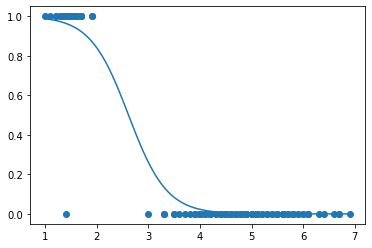

In [19]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

X_r = np.linspace(min(X['x']), max(X['x']), 100)
y_r = 1/(1+np.exp(-(intercept+X_r*coef)))
plt.plot(X_r, y_r)

plt.show()

### 3. 모형의 정확도를 측정해보기

In [20]:
print(log_reg.score(X, y))

0.9933333333333333


### 4. log.csv 파일로 회귀 진행하기

In [21]:
import pandas as pd
df = pd.read_csv("./week4_log.csv")
X = df[['x1', 'x2', 'x3','x4']]
y = df['y']

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # 여기에 매개변수로 패널티 종류, C값
log_reg.fit(X, y)

print(log_reg.intercept_)
print(log_reg.coef_)

[5.72224497]
[[-0.44763344  0.89878042 -2.1136102  -0.86566425]]


### 5. 4번을 진행한 후, 라쏘 릿지 회귀를 포함하여 진행하기 

In [22]:
# 릿지로 제약 설정, alpha = 1/λ
from sklearn.linear_model import Ridge
ridge_0_0001 = Ridge(alpha = 0.0001) # big lamda 
ridge_0_001 = Ridge(alpha = 0.001) 
ridge_0_01 = Ridge(alpha = 0.01)
ridge_0_1 = Ridge(alpha = 0.1)
ridge_1 = Ridge(alpha = 1)
ridge_10 = Ridge(alpha = 10)
ridge_100 = Ridge(alpha = 100) # small lamda

# 릿지로 학습
ridge_0_0001.fit(X, y)
ridge_0_001.fit(X, y)
ridge_0_01.fit(X, y)
ridge_0_1.fit(X, y)
ridge_1.fit(X, y)
ridge_10.fit(X, y)
ridge_100.fit(X, y)

# 결과 출력
print(log_reg.coef_)
print(ridge_0_0001.coef_)
print(ridge_0_001.coef_)
print(ridge_0_01.coef_)
print(ridge_0_1.coef_)
print(ridge_1.coef_)
print(ridge_10.coef_)
print(ridge_100.coef_)

[[-0.44763344  0.89878042 -2.1136102  -0.86566425]]
[ 0.05808584  0.24801105 -0.21519772 -0.05888311]
[ 0.05808481  0.24800307 -0.21519699 -0.0588849 ]
[ 0.0580745   0.2479233  -0.21518962 -0.05890274]
[ 0.05796968  0.24712991 -0.21511528 -0.05908003]
[ 0.0567696   0.23959379 -0.21431851 -0.06073484]
[ 0.04033076  0.18775751 -0.20570594 -0.06892535]
[-0.02258985  0.06972631 -0.1633292  -0.06504729]


In [23]:
from sklearn.linear_model import Lasso

lasso_0_0001 = Lasso(alpha = 0.0001) # big lamda 
lasso_0_001 = Lasso(alpha = 0.001) 
lasso_0_01 = Lasso(alpha = 0.01)
lasso_0_1 = Lasso(alpha = 0.1)
lasso_1 = Lasso(alpha = 1)
lasso_10 = Lasso(alpha = 10)
lasso_100 = Lasso(alpha = 100) # small lamda

# 라쏘로 학습
lasso_0_0001.fit(X, y)
lasso_0_001.fit(X, y)
lasso_0_01.fit(X, y)
lasso_0_1.fit(X, y)
lasso_1.fit(X, y)
lasso_10.fit(X, y)
lasso_100.fit(X, y)

# 결과 출력
print(log_reg.coef_)
print(lasso_0_0001.coef_)
print(lasso_0_001.coef_)
print(lasso_0_01.coef_)
print(lasso_0_1.coef_)
print(lasso_1.coef_)
print(lasso_10.coef_)
print(lasso_100.coef_)

# LogisticRegression(penalty='l2', C=lamda)
# LogisticRegression(penalty='l1', C=lamda, solver='saga') 이런 식으로도 사용 가능
# Ridge, Lasso 모듈은 solver의 default 값이 auto... 원하는대로 사용 불가능 
# penalty의 default값 = l2
# solver는 default값 lbfgs, l1 사용하려면 saga나 liblinear 사용 

[[-0.44763344  0.89878042 -2.1136102  -0.86566425]]
[ 0.05751739  0.24764648 -0.2155107  -0.05758319]
[ 0.05252874  0.24424706 -0.21847382 -0.04569506]
[ 0.          0.21871456 -0.21579479 -0.        ]
[-0.          0.         -0.20985714 -0.        ]
[-0.  0. -0. -0.]
[-0.  0. -0. -0.]
[-0.  0. -0. -0.]
